In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import math
import re
import pandas as pd
import seaborn as sn
from util import extract_word, get_words, process_files, predict, summary, get_truths

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ham_dir = 'ham'
ham_filelist = ham_dir + '/hamFileList.txt'
spam_dir = 'spam'
spam_filelist = spam_dir + '/spamFileList.txt'
test_dir = 'test'
truth_file = test_dir + '/truth'

ham_files = []
spam_files = []
test_files = [(test_dir + '/' + str(x)) for x in range(1, 101)]

with open(ham_filelist, 'r') as f:
  for line in f:
    ham_files.append(ham_dir + '/' + str(int(line)))

with open(spam_filelist, 'r') as f:
  for line in f:
    spam_files.append(spam_dir + '/' + str(int(line)))

In [3]:
print extract_word("email_body_term(1, 'jcf', 98).")
print extract_word("email_from(1, 'jforster', 'psy1.psych.arizona.edu').")
print extract_word("")

jcf
None
None


In [4]:
ham_map, total_ham_words = process_files(ham_files)
spam_map, total_spam_words = process_files(spam_files)

In [5]:
print total_ham_words
print total_spam_words

82184
79088


In [12]:
truths = get_truths(truth_file)
predictions = predict(test_files, ham_map, total_ham_words, spam_map, total_spam_words, 1, 200000)

In [13]:
tp, tn, fp, fn, precision, recall, fscore, accuracy = summary(predictions, truths)

print "True positive = " + str(tp)
print "False positive = " + str(fp)
print "False negative = " + str(fn)
print "True negative = " + str(tn)
print "Precision = " + str(precision)
print "Recall = " + str(recall)
print "F-score = " + str(fscore)
print "Accuracy = " + str(accuracy)

True positive = 49
False positive = 0
False negative = 1
True negative = 50
Precision = 1.0
Recall = 0.98
F-score = 0.989898989899
Accuracy = 0.99


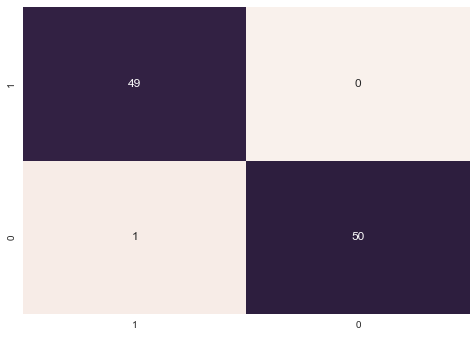

In [9]:
matrix = [[tp,fp], 
          [fn, tn]]
df_cm = pd.DataFrame(matrix, [1, 0], [1, 0])
sn.heatmap(df_cm, annot=True, cbar=False)

**Why class imbalance can make accuracy a misleading metric...**

Accuracy can be skewed if TP (true positive) or TN (true negative) is overly represented. For example, if "has cancer" is the positive label and "no cancer" is the negative label, I can run around telling everyone "no cancer" and I will have a high accuracy because I will have a high count of TN, but I will 100% miss my opportunities to correctly label "has cancer" for those true cases.
